**Exploratory Data Analysis**

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

ModuleNotFoundError: No module named 'plotly'

In [ ]:
songs = pd.read_csv("/content/songs.csv")
songs.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [ ]:
scaler = MinMaxScaler()
songs["loudness"] = scaler.fit_transform(songs["loudness"].values.reshape(-1, 1))
songs = songs.drop_duplicates(subset=["name", "artists"], keep="first")

In [ ]:
explicit_perc = songs["explicit"].sum()/len(songs) * 100
print("The percentage of explicit songs on Spotify is {explicit_perc}".format(explicit_perc = explicit_perc))
fig = px.histogram(songs, x="popularity", hover_data=songs.columns)
fig.show()

The percentage of explicit songs on Spotify is 7.898558979324485


In [ ]:
songs.drop(songs[songs["popularity"] < 20].index, inplace=True, axis=0)
fig = px.histogram(songs, x="popularity", color="explicit")
fig.show()

In [ ]:
song_atribs = songs.drop(['artists',
       'explicit', 'id', 'valence', 'year', 'name', 'mode', 'tempo', 'duration_ms', 'key', 'release_date', 'popularity'], inplace=False, axis=1)
song_atribs = song_atribs.replace(0, np.nan).dropna(axis=0, how='any')
song_atribs.head()

acousticness  danceability  energy  instrumentalness  liveness  \
1758         0.980         0.314   0.351          0.824000    0.0775   
1760         0.995         0.609   0.340          0.884000    0.1950   
1828         0.600         0.687   0.289          0.001350    0.0850   
1830         0.770         0.708   0.453          0.000002    0.0686   
1891         0.963         0.472   0.167          0.000002    0.2030   

      loudness  speechiness  
1758  0.657441       0.0383  
1760  0.652502       0.0752  
1828  0.754014       0.0526  
1830  0.773107       0.0727  
1891  0.684957       0.0307

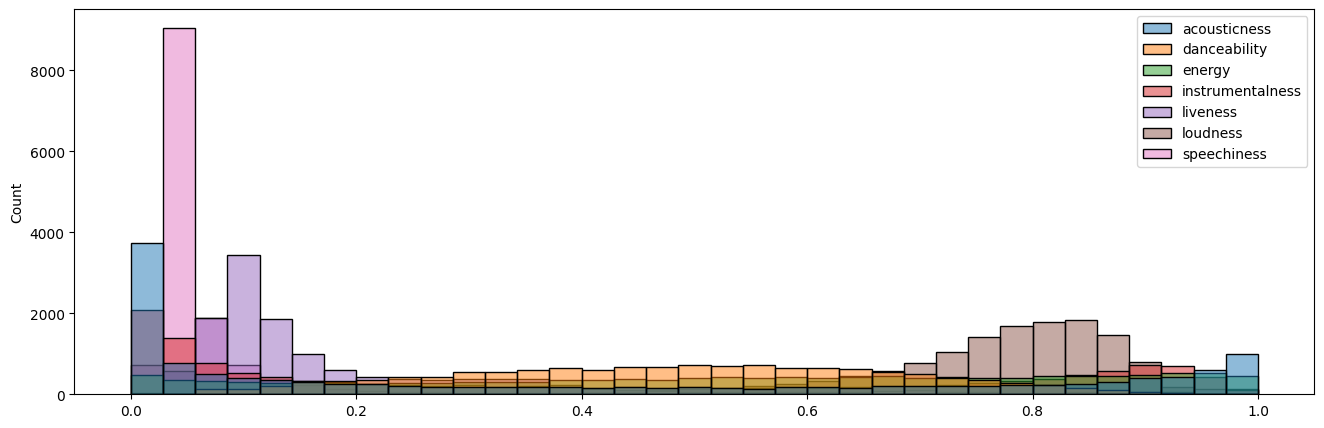

In [ ]:
song_atribs = song_atribs.loc[(song_atribs["instrumentalness"] > 0.01)]
plt.figure(figsize=(16, 5))
sns.histplot(data=song_atribs, stat='count')
plt.show()

**Preprocessing Stage - 1**

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import re
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

C:\Users\kadal\AppData\Local\Temp\ipykernel_14972\2148557319.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [3]:
songs = pd.read_csv("songs.csv")
songs.drop_duplicates(subset=["name", "artists"], keep='first')

acousticness                                   artists  danceability  \
0             0.9950                       ['Carl Woitschach']         0.708   
1             0.9940  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2             0.6040                   ['Seweryn Goszczyński']         0.749   
3             0.9950                      ['Francisco Canaro']         0.781   
4             0.9900  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   
...              ...                                       ...           ...   
169903        0.2100                  ['LEGADO 7', 'Junior H']         0.795   
169904        0.1730                    ['DripReport', 'Tyga']         0.875   
169905        0.0167        ['Leon Bridges', 'Terrace Martin']         0.719   
169906        0.5380                     ['Kygo', 'Oh Wonder']         0.514   
169907        0.0714             ['Cash Cash', 'Andy Grammer']         0.646   

        duration_ms  energy  explicit                      id  \
0            158648  0.1950         0  6KbQ3uYMLKb5jDxLF7wYDD   
1            282133  0.0135         0  6KuQTIu1KoTTkLXKrwlLPV   
2            104300  0.2200         0  6L63VW0PibdM1HDSBoqnoM   
3            180760  0.1300         0  6M94FkXd15sOAOQYRnWPN8   
4            687733  0.2040         0  6N6tiFZ9vLTSOIxkj8qKrd   
...             ...     ...       ...                     ...   
169903       218501  0.5850         0  52Cpyvd2dKb6XRn313nH87   
169904       163800  0.4430         1  4KppkflX7I3vJQk7urOJaS   
169905       167468  0.3850         0  1ehhGlTvjtHo2e4xJFB0SZ   
169906       180700  0.5390         0  52eycxprLhK3lPcRLbQiVk   
169907       167308  0.7610         0  3wYOGJYD31sLRmBgCvWxa4   

        instrumentalness  key  liveness  loudness  mode  \
0               0.563000   10    0.1510   -12.428     1   
1               0.901000    8    0.0763   -28.454     1   
2               0.000000    5    0.1190   -19.924     0   
3               0.887000    1    0.1110   -14.734     0   
4               0.908000   11    0.0980   -16.829     1   
...                  ...  ...       ...       ...   ...   
169903          0.000001    8    0.1120    -4.451     1   
169904          0.000032    1    0.0891    -7.461     1   
169905          0.031300    8    0.1110   -10.907     1   
169906          0.002330    7    0.1080    -9.332     1   
169907          0.000000    1    0.2220    -2.557     1   

                                                 name  popularity  \
0                         Singende Bataillone 1. Teil           0   
1            Fantasiestücke, Op. 111: Più tosto lento           0   
2                      Chapter 1.18 - Zamek kaniowski           0   
3       Bebamos Juntos - Instrumental (Remasterizado)           0   
4         Polonaise-Fantaisie in A-Flat Major, Op. 61           1   
...                                               ...         ...   
169903                                Ojos De Maniaco          68   
169904                  Skechers (feat. Tyga) - Remix          75   
169905                 Sweeter (feat. Terrace Martin)          64   
169906                               How Would I Know          70   
169907                                    I Found You          70   

       release_date  speechiness    tempo  valence  year  
0              1928       0.0506  118.469   0.7790  1928  
1              1928       0.0462   83.972   0.0767  1928  
2              1928       0.9290  107.177   0.8800  1928  
3        1928-09-25       0.0926  108.003   0.7200  1928  
4              1928       0.0424   62.149   0.0693  1928  
...             ...          ...      ...      ...   ...  
169903   2020-02-28       0.0374   97.479   0.9340  2020  
169904   2020-05-15       0.1430  100.012   0.3060  2020  
169905   2020-06-08       0.0403  128.000   0.2700  2020  
169906   2020-05-29       0.1050  123.700   0.1530  2020  
169907   2020-02-28       0.0385  129.916   0.4720  2020  

[156608 rows x 19 c

In [4]:
songs["artists"].fillna(songs.artists.mode())

0                              ['Carl Woitschach']
1         ['Robert Schumann', 'Vladimir Horowitz']
2                          ['Seweryn Goszczyński']
3                             ['Francisco Canaro']
4         ['Frédéric Chopin', 'Vladimir Horowitz']
                            ...                   
169904                      ['DripReport', 'Tyga']
169905          ['Leon Bridges', 'Terrace Martin']
169906                       ['Kygo', 'Oh Wonder']
169907               ['Cash Cash', 'Andy Grammer']
169908                          ['Ingrid Andress']
Name: artists, Length: 169909, dtype: object

In [5]:
songs.drop(songs[songs["popularity"] < 30].index, inplace=True, axis=0)
songs.sort_values(by="popularity", inplace=True, ascending=False)
songs.shape

(95867, 19)

In [6]:
songs["spotify_id"] = songs["id"]
songs["id"] = 0
songs.head(2)


acousticness                    artists  danceability  duration_ms  \
87942       0.00146             ['The Weeknd']         0.514       200040   
87940       0.24700  ['DaBaby', 'Roddy Ricch']         0.746       181733   

       energy  explicit  id  instrumentalness  key  liveness  loudness  mode  \
87942    0.73         0   0          0.000095    1    0.0897    -5.934     1   
87940    0.69         1   0          0.000000   11    0.1010    -7.956     1   

                               name  popularity release_date  speechiness  \
87942               Blinding Lights         100   2020-03-20       0.0598   
87940  ROCKSTAR (feat. Roddy Ricch)          99   2020-04-17       0.1640   

         tempo  valence  year              spotify_id  
87942  171.005    0.334  2020  0VjIjW4GlUZAMYd2vXMi3b  
87940   89.977    0.497  2020  7ytR5pFWmSjzHJIeQkgog4

In [7]:
songs["artists"] = songs["artists"].map(lambda x: x.split(', ')[0])
songs["artists"] = songs["artists"].map(lambda x: x.replace(']', ""))
songs["artists"] = songs["artists"].map(lambda x: x.replace('[', ""))
songs["artists"] = songs["artists"].map(lambda x: x.replace('\'', ""))
songs["artists"] = songs["artists"].map(lambda x: x.replace('\(', ""))
songs["artists"] = songs["artists"].map(lambda x: x.replace('\)', ""))

In [8]:
cols_to_keep = ["id", "name", "artists", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", "spotify_id","popularity"]
songs = songs[cols_to_keep]
songs.head()

id                                               name     artists  \
87942   0                                    Blinding Lights  The Weeknd   
87940   0                       ROCKSTAR (feat. Roddy Ricch)      DaBaby   
87949   0  death bed (coffee for your head) (feat. beabad...       Powfu   
87941   0                                         THE SCOTTS  THE SCOTTS   
87844   0                                         Supalonely       BENEE   

       acousticness  danceability  energy  instrumentalness  liveness  \
87942       0.00146         0.514   0.730          0.000095    0.0897   
87940       0.24700         0.746   0.690          0.000000    0.1010   
87949       0.73100         0.726   0.431          0.000000    0.6960   
87941       0.23300         0.716   0.537          0.000000    0.1570   
87844       0.30500         0.863   0.631          0.000030    0.1230   

       speechiness              spotify_id  popularity  
87942       0.0598  0VjIjW4GlUZAMYd2vXMi3b         100  
87940       0.1640  7ytR5pFWmSjzHJIeQkgog4          99  
87949       0.1350  7eJMfftS33KTjuF7lTsMCx          97  
87941       0.0514  39Yp9wwQiSRIDOvrVg7mbk          96  
87844       0.0534  4nK5YrxbMGZstTLbvj6Gxw          95

In [9]:
for i in range(len(songs)):
    songs.iloc[i, 0]=i
songs.head()

id                                               name     artists  \
87942   0                                    Blinding Lights  The Weeknd   
87940   1                       ROCKSTAR (feat. Roddy Ricch)      DaBaby   
87949   2  death bed (coffee for your head) (feat. beabad...       Powfu   
87941   3                                         THE SCOTTS  THE SCOTTS   
87844   4                                         Supalonely       BENEE   

       acousticness  danceability  energy  instrumentalness  liveness  \
87942       0.00146         0.514   0.730          0.000095    0.0897   
87940       0.24700         0.746   0.690          0.000000    0.1010   
87949       0.73100         0.726   0.431          0.000000    0.6960   
87941       0.23300         0.716   0.537          0.000000    0.1570   
87844       0.30500         0.863   0.631          0.000030    0.1230   

       speechiness              spotify_id  popularity  
87942       0.0598  0VjIjW4GlUZAMYd2vXMi3b         100  
87940       0.1640  7ytR5pFWmSjzHJIeQkgog4          99  
87949       0.1350  7eJMfftS33KTjuF7lTsMCx          97  
87941       0.0514  39Yp9wwQiSRIDOvrVg7mbk          96  
87844       0.0534  4nK5YrxbMGZstTLbvj6Gxw          95

Loading Artist dataset

In [12]:
artist = pd.read_csv("songs.csv")
artist.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [13]:
cols_to_keep = ["artists", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness","popularity"]
artist = artist[cols_to_keep]
artist.head()

artists  acousticness  danceability  \
0                       ['Carl Woitschach']         0.995         0.708   
1  ['Robert Schumann', 'Vladimir Horowitz']         0.994         0.379   
2                   ['Seweryn Goszczyński']         0.604         0.749   
3                      ['Francisco Canaro']         0.995         0.781   
4  ['Frédéric Chopin', 'Vladimir Horowitz']         0.990         0.210   

   energy  instrumentalness  liveness  speechiness  popularity  
0  0.1950             0.563    0.1510       0.0506           0  
1  0.0135             0.901    0.0763       0.0462           0  
2  0.2200             0.000    0.1190       0.9290           0  
3  0.1300             0.887    0.1110       0.0926           0  
4  0.2040             0.908    0.0980       0.0424           1

In [14]:
artist.rename({"artists":"name"}, axis=1, inplace=True)
artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              169909 non-null  object 
 1   acousticness      169909 non-null  float64
 2   danceability      169909 non-null  float64
 3   energy            169909 non-null  float64
 4   instrumentalness  169909 non-null  float64
 5   liveness          169909 non-null  float64
 6   speechiness       169909 non-null  float64
 7   popularity        169909 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 10.4+ MB


In [15]:
songs["acousticness_artist"] = 0
songs["danceability_artist"] = 0
songs["energy_artist"] = 0
songs["instrumentalness_artist"] = 0
songs["liveness_artist"] = 0
songs["speechiness_artist"]= 0
songs["spotify_id"]= 0
songs["popularity"] = 0

In [16]:
#this cell has been run previously and its output has been saved as a matrix and is hence not used
for i in range(len(songs)):
    artist_name = songs.iloc[i, 2]
    mask = artist["name"].str.contains(artist_name, case=False, regex=False)
    if(len(artist[mask])):
        songs.iloc[i, 10] = artist[mask].iloc[0, 1]
        songs.iloc[i, 11] = artist[mask].iloc[0, 2]
        songs.iloc[i, 12] = artist[mask].iloc[0, 3]
        songs.iloc[i, 13] = artist[mask].iloc[0, 4]
        songs.iloc[i, 14] = artist[mask].iloc[0, 5]
        songs.iloc[i, 15] = artist[mask].iloc[0, 6]
        if (i % 1000 == 0):
            print(artist[mask].iloc[0, 0])

['The Weeknd']


KeyboardInterrupt: 

In [ ]:
#need to run the previous box fully again
songs.to_csv("song_artist1.csv", index=False)

**Preprocessing Part - 2**

In [18]:
df = pd.read_csv("song_artist.csv")
df.head()

id                                               name      artists  \
0   0  death bed (coffee for your head) (feat. beabad...        Powfu   
1   1                                         THE SCOTTS   THE SCOTTS   
2   2                                            The Box  Roddy Ricch   
3   3               ily (i love you baby) (feat. Emilee)    Surf Mesa   
4   4                                         Supalonely        BENEE   

   acousticness  danceability  energy  instrumentalness  liveness  \
0        0.7310         0.726   0.431           0.00000     0.696   
1        0.2330         0.716   0.537           0.00000     0.157   
2        0.1040         0.896   0.586           0.00000     0.790   
3        0.0686         0.674   0.774           0.00188     0.393   
4        0.3050         0.863   0.631           0.00003     0.123   

   speechiness  acousticness_artist  danceability_artist  energy_artist  \
0       0.1350             0.393250             0.809500       0.408750   
1       0.0514             0.307500             0.706500       0.521000   
2       0.0559             0.184209             0.784984       0.627953   
3       0.0892             0.043200             0.680667       0.709333   
4       0.0534             0.345733             0.757444       0.574333   

   instrumentalness_artist  liveness_artist  speechiness_artist  
0                 0.000062         0.234088            0.131225  
1                 0.000000         0.159000            0.052050  
2                 0.000013         0.167566            0.229681  
3                 0.000627         0.193000            0.058133  
4                 0.000010         0.145644            0.041956

In [21]:
song_id = df[["id", "name", "artists"]]
data = df.drop(["id", "name", "artists", "acousticness", "danceability"], axis = 1).copy()
data.head()

energy  instrumentalness  liveness  speechiness  acousticness_artist  \
0   0.431           0.00000     0.696       0.1350             0.393250   
1   0.537           0.00000     0.157       0.0514             0.307500   
2   0.586           0.00000     0.790       0.0559             0.184209   
3   0.774           0.00188     0.393       0.0892             0.043200   
4   0.631           0.00003     0.123       0.0534             0.345733   

   danceability_artist  energy_artist  instrumentalness_artist  \
0             0.809500       0.408750                 0.000062   
1             0.706500       0.521000                 0.000000   
2             0.784984       0.627953                 0.000013   
3             0.680667       0.709333                 0.000627   
4             0.757444       0.574333                 0.000010   

   liveness_artist  speechiness_artist  
0         0.234088            0.131225  
1         0.159000            0.052050  
2         0.167566            0.229681  
3         0.193000            0.058133  
4         0.145644            0.041956

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
#sns.heatmap(data.corr(), annot=True)
meta = data.values
meta = meta[:10000, :]
meta.shape

(10000, 10)

<Figure size 1600x1000 with 0 Axes>

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(meta, meta)

In [24]:
np.save("sim.npy", cosine_sim)


In [25]:
song_id["search"] = song_id["name"] + ' ' + song_id["artists"]
song_id.to_csv("id2.csv", index=False)

C:\Users\kadal\AppData\Local\Temp\ipykernel_14972\394633569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_id["search"] = song_id["name"] + ' ' + song_id["artists"]


In [26]:
def get_recommendations(idx, cosine_sim):
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the songs based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar songs
    sim_scores = sim_scores[1:11]
    sim_scores.sort()
    # Get the song indices
    song_index = [i[0] for i in sim_scores]
    song_index = song_index

    # Return the top 10 most similar songs
    return song_index


sim = np.load("sim.npy")
all_res = np.zeros((1, 10))

for i in range(0, 10000):
    rec_list = get_recommendations(i, sim)
    rec_array = np.array(rec_list)
    rec_array = rec_array.reshape((1, 10))
    rec_array = rec_array.astype(int)
    all_res = np.append(all_res, rec_array, axis=0)
    #print("saved for:" + str(i))

all_res = np.delete(all_res, 0, axis=0)
np.save("light.npy", all_res)

In [27]:
loaded_array = np.load("light.npy")

# Print or inspect the loaded array
print(loaded_array)

[[2.632e+03 2.825e+03 3.220e+03 ... 8.544e+03 9.225e+03 9.921e+03]
 [4.000e+00 6.780e+02 3.028e+03 ... 8.201e+03 8.285e+03 9.009e+03]
 [2.470e+03 2.873e+03 2.937e+03 ... 7.314e+03 7.392e+03 9.790e+03]
 ...
 [1.741e+03 4.078e+03 4.293e+03 ... 6.711e+03 7.606e+03 8.494e+03]
 [4.320e+02 8.530e+02 4.152e+03 ... 8.782e+03 9.186e+03 9.203e+03]
 [4.880e+02 1.672e+03 1.739e+03 ... 5.393e+03 5.564e+03 7.141e+03]]


In [10]:
import pandas as pd
import numpy as np

# Load your original dataset (song_artist1.csv or any other dataset with song names and IDs)
original_data = pd.read_csv("song_artist.csv")

# Load the recommendations matrix (light.npy or any other matrix you generated)
recommendations_matrix = np.load("light.npy")

song_listen_count = {song_index: 0 for song_index in range(len(original_data))}

def get_recommendations(song_index):
    recommended_song_indices = recommendations_matrix[song_index]
    recommended_song_names = original_data.loc[recommended_song_indices, "name"]
    return recommended_song_names

def get_user_feedback():
    feedback = input("Did you like the recommended songs? (yes/no): ")
    return feedback.lower() == "yes"

# Initial recommendations before entering the loop
initial_song_index = 0
initial_recommendations = get_recommendations(initial_song_index)
print("Initial Recommended songs:")
for i, song_name in enumerate(initial_recommendations):
    listen_count = song_listen_count[recommendations_matrix[initial_song_index][i]]
    print(f"{i+1}. {song_name} (Listened {listen_count} times)")

# Main loop
while True:
    try:
        
        song_index = int(input("Enter the index of a song (0 to N-1) to get recommendations,-1 to exit: "))
        if song_index == -1:
            print("Thank you for using the recommendation system. Goodbye!")
            break
        recommended_songs = get_recommendations(song_index)
        
        print("Recommended songs:")
        for i, song_name in enumerate(recommended_songs):
            listen_count = song_listen_count[recommendations_matrix[song_index][i]]
            print(f"{i+1}. {song_name} (Listened {listen_count} times)")

        print("\n\n")

        liked = get_user_feedback()
        if liked:
            print("Great! Enjoy the music!")
            for recommended_song_index in recommendations_matrix[song_index]:
                song_listen_count[recommended_song_index] += 1
        else:
            print("Let's refine the recommendations based on your feedback.")
            # Let's refine the recommendations based on your feedback.
            penalty_value = 0.1  # Example penalty value
            for recommended_song_index in recommendations_matrix[song_index]:
                if recommended_song_index < recommendations_matrix.shape[1]:
                    recommendations_matrix[song_index, int(recommended_song_index)] -= penalty_value


    except ValueError:
        print("Invalid input. Please enter a valid song index.")


Initial Recommended songs:
1. Don't (Listened 0 times)
2. like that (Listened 0 times)
3. Mil Gracias Por Existir (Listened 0 times)
4. A Lo Lejos Me Veran (Listened 0 times)
5. By Myself (Listened 0 times)
6. La Boda (Listened 0 times)
7. She (Listened 0 times)
8. It's Called: Freefall (Listened 0 times)
9. La Niña de tus Ojos (Listened 0 times)
10. Te Voy A Olvidar (Listened 0 times)
Recommended songs:
1. Don't (Listened 0 times)
2. like that (Listened 0 times)
3. Mil Gracias Por Existir (Listened 0 times)
4. A Lo Lejos Me Veran (Listened 0 times)
5. By Myself (Listened 0 times)
6. La Boda (Listened 0 times)
7. She (Listened 0 times)
8. It's Called: Freefall (Listened 0 times)
9. La Niña de tus Ojos (Listened 0 times)
10. Te Voy A Olvidar (Listened 0 times)



Great! Enjoy the music!
Recommended songs:
1. Stupid Love (Listened 0 times)
2. Never Really Over (Listened 0 times)
3. X (with KAROL G) (Listened 0 times)
4. Like I Do (Listened 0 times)
5. Let's Get Loud (Listened 0 times)
6.